## Wrangling Data from Twitter Archive

### Introduction

In this project, I will be gathering, assessing and cleaning some archived data from the social media giant - Twitter.



<a id='contents_table'></a>

## Table of Contents
- [Introduction](#intro)
- [Part I - Gather](#gather)
- [Part II - Assess](#assess)
- [Part III - Clean](#clean)
- [Part IV - Store](#store)
- [Part IV - Analyze](#analyze)


<a id='intro'></a>

### Introduction


### About Us on Company Website

In [1]:
# importing all neccessary dependencies

import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
import matplotlib.pyplot as plt
import warnings

## Gathering dataset

In [2]:
# Load csv data into datafram

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [113]:
# Use requests library to download tsv file from a website
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

# Read in tsv file as a Pandas DataFrame    
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [4]:
# API keys, secrets, and tokens have been replaced with placeholders
#consumer_key = 'MY CONSUMER KEY'
#consumer_secret = 'MY CONSUMER SECRET'
#access_token = 'MY ACCESS TOKEN'
#access_secret = 'MY ACCESS SECRET'


# Personal API keys, secrets, and tokens have been replaced with placeholders
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

In [6]:

# Variables created for tweepy query
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [114]:
# For loop which will add each available tweet to a new line of tweet_json.txt
with open('tweet_json.txt', 'a', encoding='utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

In [7]:
# For loop to append each tweet into a list
tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [8]:
# Creating a tweet_info DataFrame
tweet_info = pd.DataFrame()

In [9]:
# Add selected variables to tweet_info DataFrame
tweet_info['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

In [10]:
# just checking to be sure

tweet_info.head()

,id,retweet_count,favorite_count
0,892420643555336193,8795,39370
1,892177421306343426,6448,33698
2,891815181378084864,4273,25394
3,891689557279858688,8884,42743
4,891327558926688256,9668,40904


## Assessing dataset

In [11]:
# View first 20 rows of twitter_archive DataFrame
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
# View first 20 rows of twitter_archive DataFrame
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [13]:
# View first 20 rows of twitter_archive DataFrame
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
# View first 20 rows of twitter_archive DataFrame
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [115]:
# viewing first 5 rows of Dataframe
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [116]:
# viewing last 5 rows of Dataframe
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [117]:
# viewing info of image_prediction Dataframe
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [118]:
# viewing basic statistics info of image_predictions Dataframe
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
# View first 5 rows of tweet_info DataFrame
tweet_info.head()

,id,retweet_count,favorite_count
0,892420643555336193,8795,39370
1,892177421306343426,6448,33698
2,891815181378084864,4273,25394
3,891689557279858688,8884,42743
4,891327558926688256,9668,40904


In [21]:
# View last 5 rows of tweet_info DataFrame
tweet_info.tail()

,id,retweet_count,favorite_count
2345,666049248165822465,40,111
2346,666044226329800704,144,307
2347,666033412701032449,46,128
2348,666029285002620928,47,132
2349,666020888022790149,527,2528


In [22]:
# View info of tweet_info DataFrame
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 3 columns):
id                2350 non-null int64
retweet_count     2350 non-null int64
favorite_count    2350 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [23]:
# viewing basic statistics info of tweet_info Dataframe
tweet_info.describe()

,id,retweet_count,favorite_count
count,2.350000e+03,2350.000000,2350.000000
mean,7.425233e+17,3104.064681,8110.702553
std,6.844886e+16,5138.133282,12033.993390
min,6.660209e+17,0.000000,0.000000
25%,6.783910e+17,617.000000,1418.000000
50%,7.193360e+17,1447.500000,3589.000000
75%,7.989319e+17,3612.250000,10108.250000
max,8.924206e+17,78839.000000,131922.000000


In [24]:
# before saving, convert change id to tweet_id for potential merge.
tweet_info.rename(columns = {'id':'tweet_id'}, inplace=True)

In [25]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 3 columns):
tweet_id          2350 non-null int64
retweet_count     2350 non-null int64
favorite_count    2350 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [28]:
# very good, now I save tweet_info as CSV
tweet_info.to_csv('fav_ret_count.csv', index=False)

In [27]:
# View rows in twitter_archive which contain '&amp;' 
# instead of '&' in 'text' column
twitter_archive[twitter_archive.text.str.contains('&amp;')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
262,842765311967449089,NaN,NaN,2017-03-17 15:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Indie. She's not a fan of baths but she's...,NaN,NaN,NaN,"https://www.gofundme.com/get-indie-home/,https...",12,10,Indie,None,None,None,None
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Pipsy. He is a fluffbal...,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
320,834458053273591808,NaN,NaN,2017-02-22 17:41:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chester (bottom) &amp; Harold (top). They...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834458053...,12,10,Chester,None,None,None,None
461,817536400337801217,NaN,NaN,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Eugene &amp; Patti Melt. No matte...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817536400...,12,10,Eugene,None,None,None,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
799,772826264096874500,NaN,NaN,2016-09-05 15:58:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Roosevelt. He's preparing for takeoff. Ma...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772826264...,11,10,Roosevelt,None,None,None,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
898,758854675097526272,NaN,NaN,2016-07-29 02:40:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lilli Bee &amp; Honey Bear. Unfortunat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758854675...,11,10,Lilli,None,None,None,None
976,750026558547456000,NaN,NaN,2016-07-04 18:00:41 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Jax &amp; Jil. Jil is yelling the pledge ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750026558...,10,10,Jax,None,None,None,None


In [29]:
# View rows where the value of 'name' is lowercase and the word 'named' appears in the 'text' column which indicates 
# there is an actual dog name in the text
twitter_archive.loc[(twitter_archive['name'].str.islower()) & (twitter_archive['text'].str.contains('named'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sizzlin Menorah spaniel from Brookly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639...,10,10,a,None,None,None,None
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Lofted Aphrodisiac Terrier named Kip...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718...,10,10,a,None,None,None,None
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150...,11,10,a,None,None,None,None
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Helvetica Listerine named Rufus. Thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085...,9,10,a,None,None,None,None
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Deciduous Trimester mix named Spork....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002...,9,10,a,None,None,None,None
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Rich Mahogany Seltzer named Cherokee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874...,9,10,a,None,None,None,None
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Speckled Cauliflower Yosemite named ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360...,9,10,a,None,None,None,None
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323...,10,10,a,None,None,None,None
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Coriander Baton Rouge named Alfredo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669564461...,10,10,a,None,None,None,None
2191,668955713004314625,NaN,NaN,2015-11-24 00:54:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Slovakian Helter Skelter Feta named ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668955713...,10,10,a,None,None,None,None


In [30]:

# View rows where the value of 'name' is lowercase and the words 'name is' appears in the 'text' column which indicates 
# there is an actual dog name in the text
twitter_archive.loc[(twitter_archive['name'].str.islower()) & (twitter_archive['text'].str.contains('name is'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769...,13,10,my,None,None,None,None
2287,667177989038297088,NaN,NaN,2015-11-19 03:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Dasani Kingfisher from Maine. His na...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667177989...,8,10,a,None,None,None,None


In [31]:

# View row where dog name is 'O' but we can see in the 'text' column that the dog's name is actually 'O'Malley' 
twitter_archive[twitter_archive.name == "O"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None


In [32]:
#disable warnings
warnings.simplefilter('ignore')

In [33]:
# View rows where text column contains #.#/# indicating a decimal for the rating numerator, 
# however they do not appear in the 'rating_numerator' column
twitter_archive[twitter_archive.text.str.contains(r"(\d+\.\d*\/\d+)")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


In [34]:
# View row of specific tweet using tweet_id of a tweet that doesn't have a rating 
twitter_archive[twitter_archive.tweet_id == 810984652412424192]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


### Quality Issues: summary of issues with data quality

I found the following

1. Missing values in 'name' and dog stages showing as 'None'
1. rows with null values in expanded_uris column have no images
2. incorrect data type for the timestamp column
3. HTML tags are present in source 
4. Fix rating numerator and denominators that are not ratings
5. Fixing rating numerator that have decimals
6. getting dogs gender column from text column
7. records that have a None placeholder do not have a name in the text column
8. dog_category has the wrong data type

### Tidiness Issues: summary of issues with data tidiness

I found the following:

1. twitter_archive and tweet_info should be combined
1. duplicated data in twitter_archieve
2. unnecessary columns in form of: doggo, floffer, pupper, puppo. 
3. image_predictions should be a part of twitter_archive


## Cleaning dataset

Time to clean our dataset using the three steps - Define, Code and Test.

In [35]:
# to begin cleaning we first copy dataframe

twitter_archive_clean = twitter_archive.copy()

### Quality issues

#### Define

Issue: rows with null values in expanded_urls column have no images

Action: drop rows with null values in expanded_urls column


#### Code

In [36]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.expanded_urls.notnull()]

#### Test

In [37]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null object
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
dtypes: float64(4), int64(3), ob

#### Define

Issue: incorrect data type for the timestamp column

Action: convert timestamp data from objects to datetime

#### Code

In [38]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [39]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [40]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null datetime64[ns, UTC]
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
dtypes: datetime64[

#### Define

Issue: HTML tags are present in source column

Action: eliminate HTML tags using the replace() function


#### Code

In [41]:
twitter_archive_clean.source = twitter_archive_clean.source.str.replace(r'<[^>]*>', '')

#### Test

In [42]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone     2163
Vine - Make a Scene      91
Twitter Web Client       32
TweetDeck                11
Name: source, dtype: int64

#### Define

Issue: Fix rating numerator and denominators that are not ratings

#### Code

In [43]:
# View all occurences where there are more than one #/# in 'text' column
text_ratings_to_fix = twitter_archive_clean[twitter_archive_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

text_ratings_to_fix

561     RT @dog_rates: "Yep... just as I suspected. Yo...
766     "Yep... just as I suspected. You're not flossi...
784     RT @dog_rates: After so many requests, this is...
860     RT @dog_rates: Meet Eve. She's a raging alcoho...
1007    This is Bookstore and Seaweed. Bookstore is ti...
1068    After so many requests, this is Bretagne. She ...
1165    Happy 4/20 from the squad! 13/10 for all https...
1202    This is Bluebert. He just saw that both #Final...
1222    Meet Travis and Flurp. Travis is pretty chill ...
1359    This is Socks. That water pup w the super legs...
1459    This may be the greatest video I've ever been ...
1465    Meet Oliviér. He takes killer selfies. Has a d...
1508    When bae says they can't go out but you see th...
1525    This is Eriq. His friend just reminded him of ...
1538    Meet Fynn &amp; Taco. Fynn is an all-powerful ...
1662    This is Darrel. He just robbed a 7/11 and is i...
1795    Meet Tassy &amp; Bee. Tassy is pretty chill, b...
1832    These 

In [ ]:
for entry in text_ratings_to_fix:
    mask = twitter_archive_clean.text == entry
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    twitter_archive_clean.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    twitter_archive_clean.loc[mask, column_name2] = 10

#### Test

In [44]:
twitter_archive_clean[twitter_archive_clean.text.isin(text_ratings_to_fix)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
561,802624713319034886,NaN,NaN,2016-11-26 21:26:58+00:00,Twitter for iPhone,"RT @dog_rates: ""Yep... just as I suspected. Yo...",7.776842e+17,4.196984e+09,2016-09-19 01:42:24 +0000,https://twitter.com/dog_rates/status/777684233...,12,10,None,None,None,None,None
766,777684233540206592,NaN,NaN,2016-09-19 01:42:24+00:00,Twitter for iPhone,"""Yep... just as I suspected. You're not flossi...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/777684233...,12,10,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06+00:00,Twitter for iPhone,"RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
860,763167063695355904,NaN,NaN,2016-08-10 00:16:21+00:00,Twitter for iPhone,RT @dog_rates: Meet Eve. She's a raging alcoho...,6.732953e+17,4.196984e+09,2015-12-06 00:17:55 +0000,https://twitter.com/dog_rates/status/673295268...,8,10,Eve,None,None,pupper,None
1007,747600769478692864,NaN,NaN,2016-06-28 01:21:27+00:00,Twitter for iPhone,This is Bookstore and Seaweed. Bookstore is ti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747600769...,10,10,Bookstore,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38+00:00,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47+00:00,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11+00:00,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1222,714258258790387713,NaN,NaN,2016-03-28 01:10:13+00:00,Twitter for iPhone,Meet Travis and Flurp. Travis is pretty chill ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714258258...,10,10,Travis,None,None,None,None
1359,703356393781329922,NaN,NaN,2016-02-26 23:10:06+00:00,Twitter for iPhone,This is Socks. That water pup w the super legs...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703356393...,9,10,Socks,None,None,None,None


#### Define

Issues: Fixing rating numerator that have decimals

#### Code

In [45]:
# View tweets with decimals in rating in 'text' column
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19+00:00,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49+00:00,Twitter for iPhone,"RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56+00:00,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00+00:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


In [46]:
# Set correct numerators for specific tweets
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 883482846933004288) & (twitter_archive_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 786709082849828864) & (twitter_archive_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 778027034220126208) & (twitter_archive_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 680494726643068929) & (twitter_archive_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26

#### Test

In [47]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19+00:00,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,13.50,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49+00:00,Twitter for iPhone,"RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75.00,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56+00:00,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,None,None,pupper,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00+00:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,None,None,None,None


#### Define

Issue: getting dogs gender column from text column


#### Code

In [48]:
# Loop on all the texts and check if it has one of pronouns of male or female
# and append the result in a list

male = ['He', 'he', 'him', 'his', "he's", 'himself']
female = ['She', 'she', 'her', 'hers', 'herself', "she's"]

dog_gender = []

for text in twitter_archive_clean['text']:
    # Male
    if any(map(lambda v:v in male, text.split())):dog_gender.append('male')
    # Female
    elif any(map(lambda v:v in female, text.split())):dog_gender.append('female')
    # If group or not specified
    else: dog_gender.append('NaN')


In [51]:
# Saving the result in a new column 'dog_name'
twitter_archive_clean['dog_gender'] = dog_gender

#### Test

In [52]:
print("dog_gender count \n", twitter_archive_clean.dog_gender.value_counts())

dog_gender count 
 NaN       1331
male       707
female     259
Name: dog_gender, dtype: int64


#### Define

Issue: records that have a None placeholder do not have a name in the text column

Action: convert the none to NaN name column

#### Code

In [53]:
# we achieve this using the pandas replace() function

twitter_archive_clean.name = twitter_archive_clean.name.replace('None', np.nan)

#### Test

In [55]:
# testing our code using a query() function
# result should return a value of zero

twitter_archive_clean.query('name == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_gender


#### Define

Issue: dog_category has the wrong data type

Action: convert data type from object to category

#### Code

In [56]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null datetime64[ns, UTC]
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null float64
rating_denominator            2297 non-null int64
name                          1611 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
dog_gender       

In [71]:
# we convert data type using astype() function

twitter_archive_clean.dog_category = twitter_archive_clean.dog_category.astype('category')

#### Test

In [58]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null datetime64[ns, UTC]
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null float64
rating_denominator            2297 non-null int64
name                          1611 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
dog_gender       

### Tidiness issues

#### Define

Issue: twitter_archive and tweet_info should be combined

Action: merge both dataframes using inner merge. Like an SQL join function, the inner merge will not include retweet data and deleted tweets from fav_ret_counts table and twitter_archive respectively. This is good.

In [59]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 3 columns):
tweet_id          2350 non-null int64
retweet_count     2350 non-null int64
favorite_count    2350 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


#### Code

In [60]:
# using inner merge to combine the seperate dataframes into one
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_info, on='tweet_id', how='inner')

#### Test

In [61]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2291 entries, 0 to 2290
Data columns (total 20 columns):
tweet_id                      2291 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2291 non-null datetime64[ns, UTC]
source                        2291 non-null object
text                          2291 non-null object
retweeted_status_id           174 non-null float64
retweeted_status_user_id      174 non-null float64
retweeted_status_timestamp    174 non-null object
expanded_urls                 2291 non-null object
rating_numerator              2291 non-null float64
rating_denominator            2291 non-null int64
name                          1608 non-null object
doggo                         2291 non-null object
floofer                       2291 non-null object
pupper                        2291 non-null object
puppo                         2291 non-null object
dog_gender       

#### Define

Issue: duplicated data in twitter_archieve
Action: drop duplicated non-null values and duplicated rows

#### Code

In [62]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

In [63]:
twitter_archive_clean.drop_duplicates();

#### Test

In [64]:
# this should return a result of 0

twitter_archive_clean.retweeted_status_id.notnull().sum()

0

In [65]:
# this should also return a zero value

twitter_archive_clean.duplicated().sum()

0

#### Define

Issue: unnecessary columns in form of: doggo, floffer, pupper, puppo. 

Action: all four columns should be combined into one columns - dog_category - then dropped

#### Code

In [66]:
# use extract method to create a dog_stage column

twitter_archive_clean['dog_category'] = twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)', expand=True)

In [67]:
# deleting all four seperate columns
twitter_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'],
                           inplace=True)

#### Test

In [68]:
# this should not return any of the deleted four column names

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2290
Data columns (total 17 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns, UTC]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null float64
rating_denominator            2117 non-null int64
name                          1495 non-null object
dog_gender                    2117 non-null object
retweet_count                 2117 non-null int64
favorite_count                2117 non-null int64
dog_category                  356 non-null object
dtypes: datetime64[ns, UTC

In [72]:
# checking to see the new column created - dog_category
# results should display all four categories

twitter_archive_clean.dog_category.value_counts()

pupper     242
doggo       81
puppo       29
floofer      4
Name: dog_category, dtype: int64

#### Define

Issue: image_predictions should be a part of twitter_archive

Action: merge image_predictions with twitter_archive 

#### Code

In [73]:
# use pd.merge() function to merge

twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions, on='tweet_id', how='inner')

NameError: name 'image_predictions' is not defined

#### Test

In [74]:

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2290
Data columns (total 17 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns, UTC]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null float64
rating_denominator            2117 non-null int64
name                          1495 non-null object
dog_gender                    2117 non-null object
retweet_count                 2117 non-null int64
favorite_count                2117 non-null int64
dog_category                  356 non-null category
dtypes: category(1), dat

In [78]:
# set panda's option to display all 24 columns
pd.set_option('display.max_columns', 24)

twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_gender,retweet_count,favorite_count,dog_category
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,8795,39370,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,female,6448,33698,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,male,4273,25394,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,female,8884,42743,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,male,9668,40904,NaN


## Storing dataset

In [76]:
# saving cleaned dataset using to_csv() function

twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

In [81]:
# converting dog_category data type from object to category

df.timestamp = pd.to_datetime(df.timestamp)
df.dog_category = df.dog_category.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 17 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns, UTC]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null float64
rating_denominator            2117 non-null int64
name                          1495 non-null object
dog_gender                    892 non-null object
retweet_count                 2117 non-null int64
favorite_count                2117 non-null int64
dog_category                  356 non-null category
dtypes: category(1), dat

## Analysis and Visualizations

In [79]:
import seaborn as sb

In [80]:
# reading data from CSV

df = pd.read_csv('twitter_archive_master.csv')


In [82]:
# viewing first 5 columns
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_gender,retweet_count,favorite_count,dog_category
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,8795,39370,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,female,6448,33698,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,male,4273,25394,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,female,8884,42743,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,male,9668,40904,NaN


### Exploring distribution of favourite count

In [111]:
# set the grid style to dark grid
sb.set_style('darkgrid')

# set the size of figures to 10 inches by 6 inches
plt.rcParams['figure.figsize'] = (10, 6)
# set the font size of axis labels to 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14

In [84]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 3 columns):
tweet_id          2350 non-null int64
retweet_count     2350 non-null int64
favorite_count    2350 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


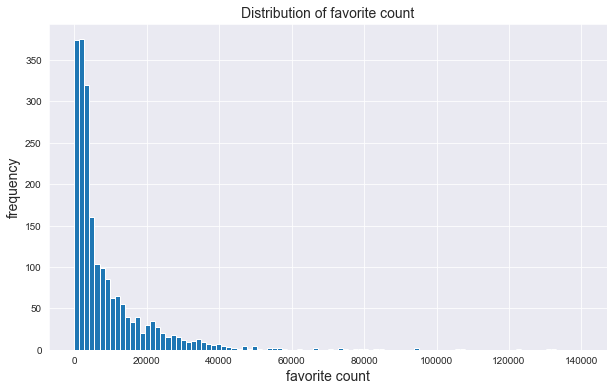

In [86]:
bin_boundaries = np.linspace(0,140000, 101)
plt.hist(df.favorite_count, bins=bin_boundaries)
plt.xlabel('favorite count')
plt.ylabel('frequency')
plt.title('Distribution of favorite count');

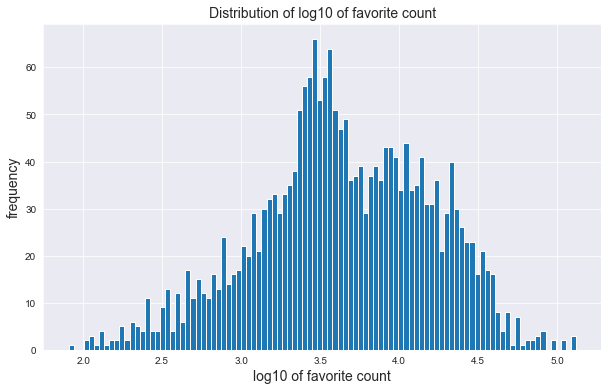

In [94]:
# using the logrithmic property to get a better view

log_favorite = df['favorite_count'].apply(lambda x: np.log10(x))
plt.hist(log_favorite, bins=100)
plt.xlabel('log10 of favorite count')
plt.ylabel('frequency')
plt.title('Distribution of log10 of favorite count');

### Exploring Distribution of Retweet Counts

In [89]:
# first we find retweet counts
tweet_info.retweet_count.describe()

count     2350.000000
mean      3104.064681
std       5138.133282
min          0.000000
25%        617.000000
50%       1447.500000
75%       3612.250000
max      78839.000000
Name: retweet_count, dtype: float64

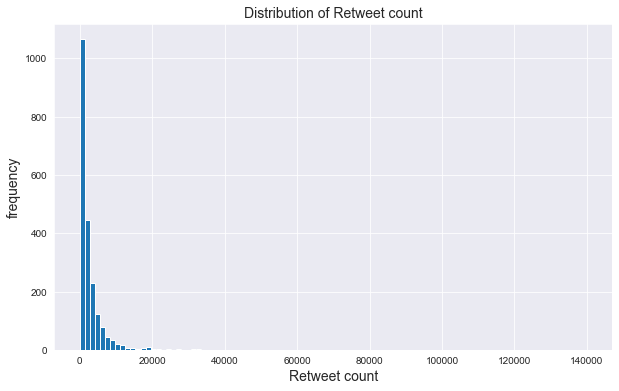

In [91]:
bin_boundaries = np.linspace(0,140000, 101)
plt.hist(df.retweet_count, bins=bin_boundaries)
plt.xlabel('Retweet count')
plt.ylabel('frequency')
plt.title('Distribution of Retweet count');

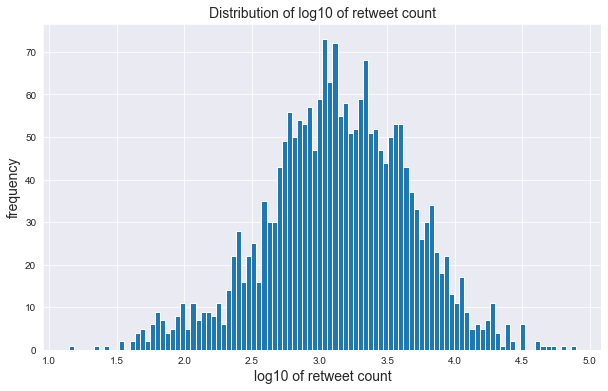

In [95]:
# getting a better view using logrithm

log_retweet = df['retweet_count'].apply(lambda x: np.log10(x))
plt.hist(log_retweet, bins=100)
plt.xlabel('log10 of retweet count')
plt.ylabel('frequency')
plt.title('Distribution of log10 of retweet count');

### Exploring Distribution of Rating Values

In [100]:
# getting statistics on rating numerator

df['rating_denominator'].describe()

count    2117.000000
mean       10.501181
std         7.105845
min         2.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [103]:
# defining our rating counts

rate_count = df.groupby(['rating_denominator']).count()['tweet_id']
rate_count

rating_denominator
2         1
7         1
10     2099
11        2
20        1
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: tweet_id, dtype: int64

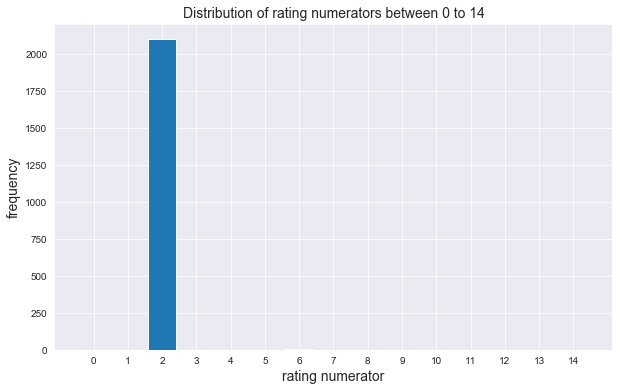

In [106]:
#plot the bar charts for distribution of rating numerators between 0 to 14

plt.bar(np.arange(15), rate_count)
plt.xticks(np.arange(15))
plt.xlabel('rating numerator')
plt.ylabel('frequency')
plt.title('Distribution of rating numerators between 0 to 14');

I noticed that most ratings are 14 and below, we'll check the tweets for ratings above 30.

In [108]:
# creating a sub_rating

rating_14 = df[(df.rating_numerator <= 14) & (df.rating_numerator.apply(float.is_integer))]

# getting all rating counts of the sub_rating

sub_rating = rating_14.groupby(['rating_numerator']).count()['tweet_id']
sub_rating

rating_numerator
0.0       2
1.0       5
2.0       9
3.0      19
4.0      16
5.0      33
6.0      32
7.0      52
8.0      98
9.0     154
10.0    436
11.0    417
12.0    489
13.0    295
14.0     40
Name: tweet_id, dtype: int64

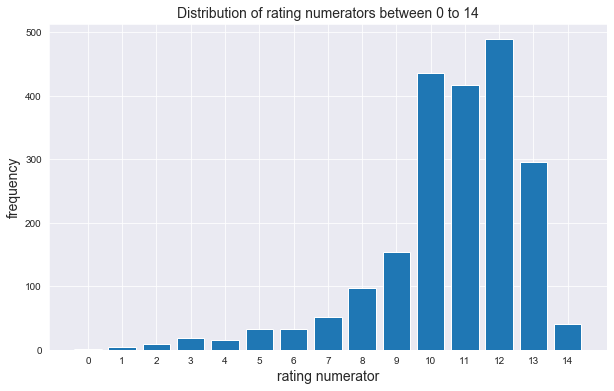

In [110]:
# now we plot another chart

plt.bar(np.arange(15), sub_rating)
plt.xticks(np.arange(15))
plt.xlabel('rating numerator')
plt.ylabel('frequency')
plt.title('Distribution of rating numerators between 0 to 14');

## References

- Regular expression operations https://docs.python.org/3/library/re.html
- Customize matplotlib using rcParams
https://www.youtube.com/watch?v=hJI0wZV7VnA
https://matplotlib.org/users/customizing.html
- Set binwidth in matplotlib using numpy.linspace()
https://stackoverflow.com/questions/28101623/python-pyplot-histogram-adjusting-bin-width-not-number-of-bins/28101842
https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html
- Plot datetime in scatterplots
https://stackoverflow.com/questions/33676608/pandas-type-error-trying-to-plot
https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot_date.html
- Set size of plots using plt.figure() https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
- Convert Tweepy Status Object into JSON https://stackoverflow.com/questions/27900451/convert-tweepy-status-object-into-json
- github.com/help https://github.com/abodacs/Wrangle-and-Analyze-Data-DAND-project/blob/master/wrangle_act.ipynb
- The structure of the Status object of Tweepy https://gist.github.com/dev-techmoe/ef676cdd03ac47ac503e856282077bf2
- Twitter API - get tweets with specific id https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
- Tweepy documentation http://tweepy.readthedocs.io/en/v3.5.0/index.html
- Reading and Writing JSON to a File in Python http://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
- Clear cell output in a loop https://stackoverflow.com/questions/24816237/ipython-notebook-clear-cell-output-in-code
- Use astype() when NaN is present in pandas series - https://stackoverflow.com/questions/41550746/error-using-astype-when-nan-exists-in-a-dataframe
- Select part of the string in a column
https://stackoverflow.com/questions/11350770/pandas-dataframe-select-by-partial-string
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html
- Set options https://pandas.pydata.org/pandas-docs/stable/generated/pandas.set_option.html#pandas.set_option
- Set value for one cell https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index

- Log transform scales https://matplotlib.org/2.0.1/users/transforms_tutorial.html
- Search for integers in a float column https://stackoverflow.com/questions/49249860/how-to-check-if-float-pandas-column-contains-only-whole-number